## Task 1 & 2: Dataset Generation and Investigate method assumptions
 
### Logistic Regression
Logistic Regression Assumptions and Characteristics:

- First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

- Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

- Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  Meaning, that the independent variables should not be too highly correlated with each other.

- Fourth, logistic regression assumes linearity of independent variables and log odds of the dependent variable. Although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds of the dependent variable.


- Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/

Having the premise of linearity of the independent variables and log odds of the depedndent variable. We create a linear logit function = logit = beta_0 + beta_1 * X1 + beta_2 * X2. Where beta_0 is the intercept (or bias term) and beta_1 and beta_2 are the coefficients (weights) for the predictors X1 and X2.

The logit(P(Y==1)) = log(P(Y==1)/(1-P(Y==1))), therefore we need to make probabilities out of the outcomes of the logit function using the logistic function. Now that we have the probability we can create the output set.




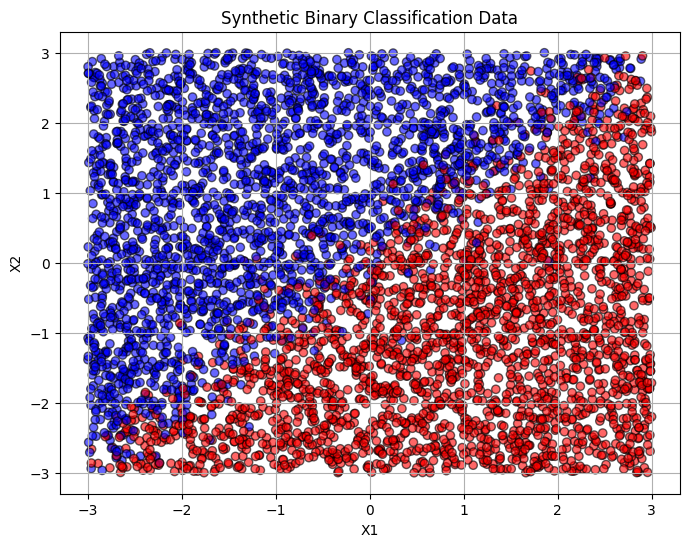

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Step 1: Generate data
np.random.seed(42)
n = 5000
X1 = np.random.uniform(-3, 3, n)
X2 = np.random.uniform(-3, 3, n)
noise = np.random.normal(0, 0.5, n)
y = (X1 - X2 + noise > 0).astype(int)

# Combine features
X = np.vstack((X1, X2)).T

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, c=y, cmap='bwr', alpha=0.6, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Binary Classification Data')
plt.grid(True)
plt.show()


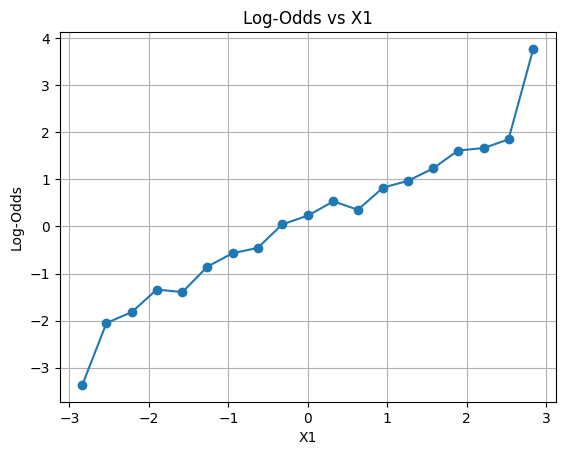

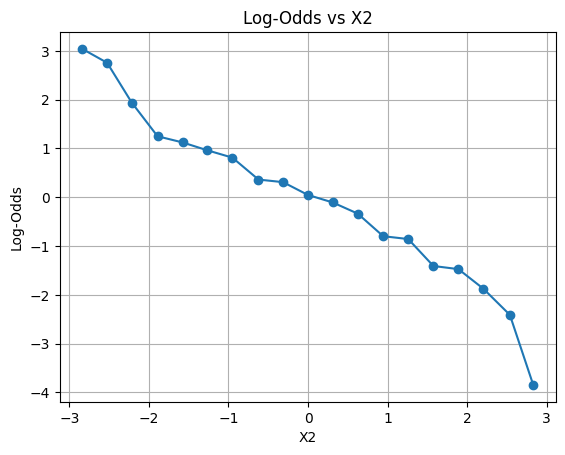

In [ ]:
def plot_log_odds(X_feature, y, feature_name):
    bins = np.linspace(X_feature.min(), X_feature.max(), 20)
    digitized = np.digitize(X_feature, bins)
    log_odds = []
    bin_centers = []

    for i in range(1, len(bins)):
        y_bin = y[digitized == i]
        if len(y_bin) > 0 and np.any(y_bin) and np.any(y_bin == 0):
            p = np.mean(y_bin)
            odds = p / (1 - p)
            log_odds.append(np.log(odds))
            bin_centers.append(np.mean(X_feature[digitized == i]))

    plt.plot(bin_centers, log_odds, marker='o')
    plt.xlabel(feature_name)
    plt.ylabel('Log-Odds')
    plt.title(f'Log-Odds vs {feature_name}')
    plt.grid(True)
    plt.show()

plot_log_odds(X1, y, 'X1')
plot_log_odds(X2, y, 'X2')


In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {acc:.3f}")


Logistic Regression Test Accuracy: 0.936


In [ ]:
# 5-fold cross-validation accuracy
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()

print(f"5-Fold Cross-Validation Accuracy: {cv_mean:.3f}")


5-Fold Cross-Validation Accuracy: 0.940


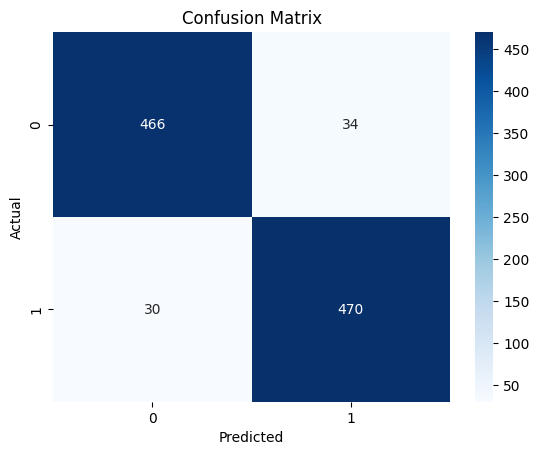

In [ ]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Why This Dataset is Hard to Beat
- Logistic Regression fits perfectly since it assumes a linear decision boundary. Also, the relationship of each independent variable with the log odds of the dependent variable is linear.
- Moreover, add some noise which Linear Regression will work fine around, but for example a Linear SVM wont be able to determine the max margins because of it

### Linear Discriminant Analysis - LDA
LDA Assumptions and Characteristics
- The input dataset has a Gaussian distribution, where plotting the data points gives a bell-shaped curve.
- The data set is linearly separable, meaning LDA can draw a straight line or a decision boundary that separates the data points.
- Each class has the same covariance matrix.

https://www.ibm.com/think/topics/linear-discriminant-analysis

The LDA projects the bidemnsional data set onto a lower dimension than a set of coordinates (a line, in this case), find the decision boundary using the means and variance of the 2 classes and then project it back to 2D.

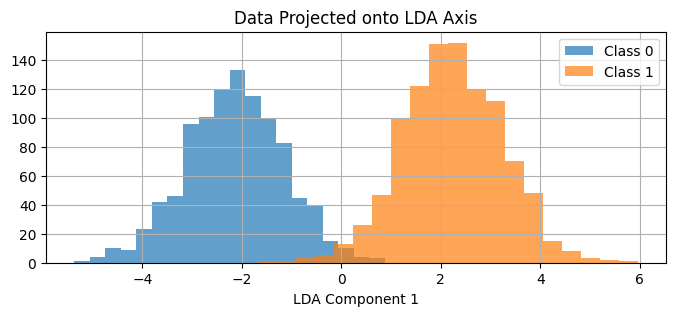

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Set seed
np.random.seed(0)

# Covariance matrix (same for both classes)
cov_matrix = np.array([[1, 0.75],
                       [0.75, 1]])

# Mean vectors for each class
mean_class1 = np.array([2, 2])
mean_class2 = np.array([6, 6])

# Generate data
n_samples = 1000
X_class1 = np.random.multivariate_normal(mean_class1, cov_matrix, n_samples)
X_class2 = np.random.multivariate_normal(mean_class2, cov_matrix, n_samples)

# Combine data
X = np.vstack((X_class1, X_class2))
y = np.array([0]*n_samples + [1]*n_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Project data onto LDA component
X_lda = lda.transform(X)

# Plot 1D projection
plt.figure(figsize=(8, 3))
plt.hist(X_lda[y == 0], label='Class 0', alpha=0.7, bins=20)
plt.hist(X_lda[y == 1], label='Class 1', alpha=0.7, bins=20)
plt.title('Data Projected onto LDA Axis')
plt.xlabel('LDA Component 1')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Predict labels using the trained LDA model
y_pred = lda.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print(f"Accuracy of LDA classifier: {accuracy * 100:.2f}%")

Accuracy of LDA classifier: 98.75%


In [ ]:
# 5-fold cross-validation accuracy
cv_scores = cross_val_score(lda, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()

print(f"5-Fold Cross-Validation Accuracy: {cv_mean * 100:.2f}")


5-Fold Cross-Validation Accuracy: 98.75


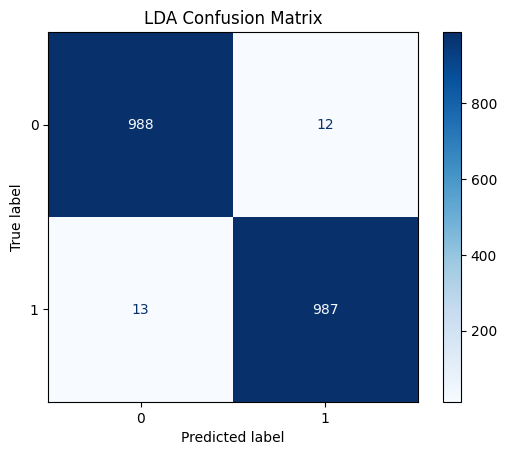

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_pred = lda.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot(cmap='Blues')
plt.title('LDA Confusion Matrix')
plt.grid(False)
plt.show()

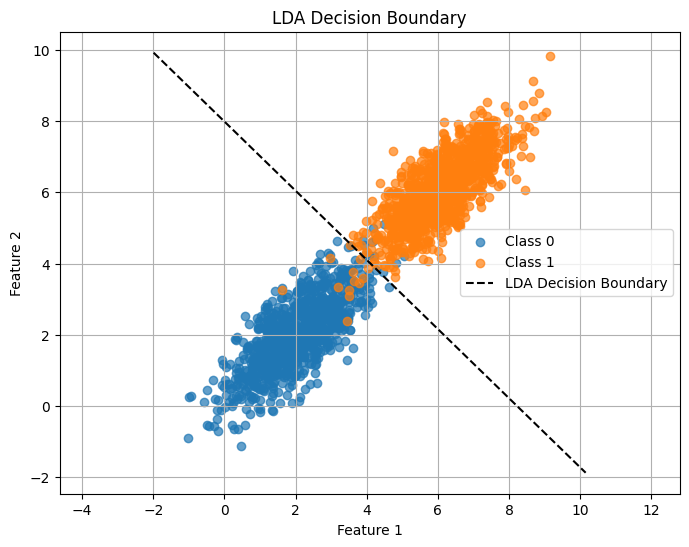

In [ ]:
# Decision boundary
slope = -lda.coef_[0][0] / lda.coef_[0][1]
intercept = -lda.intercept_[0] / lda.coef_[0][1]
x_vals = np.linspace(X_test[:,0].min()-1, X[:,0].max()+1, 200)
decision_boundary = slope * x_vals + intercept

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], label='Class 0', alpha=0.7)
plt.scatter(X_class2[:, 0], X_class2[:, 1], label='Class 1', alpha=0.7)
plt.plot(x_vals, decision_boundary, color='black', linestyle='--', label='LDA Decision Boundary')
plt.title('LDA Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


### Why This Dataset is Hard to Beat for LDA
- LDA works best because the data follows a Gaussian distribution, and both classes have equal covariance. This allows LDA to find the optimal linear boundary and project the classes to a lower dimension accordingly.


 ### Quadratic Discriminant Analysis (QDA)

**QDA Assumptions and Characteristics**  
- **Gaussian Distribution**: Each class is assumed to follow a Gaussian (normal) distribution.  
- **Different Covariance Matrices**: Unlike LDA, QDA allows each class to have its own covariance matrix.  
- **Non-linear Boundaries**: QDA can model more complex, non-linear decision boundaries.

https://www.geeksforgeeks.org/quadratic-discriminant-analysis/

https://www.kaggle.com/discussions/general/448328

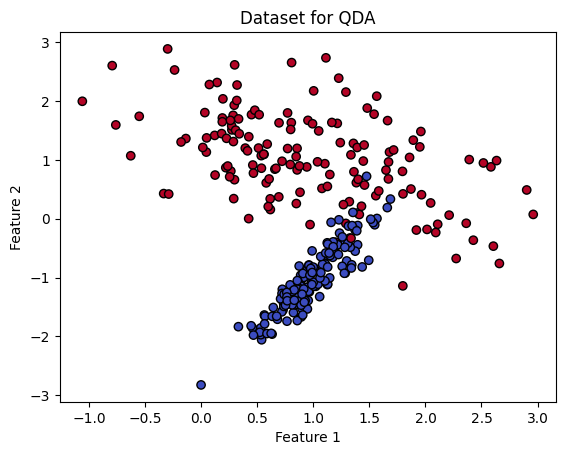

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0,
    n_clusters_per_class=1, 
    n_classes=2, 
    random_state=42)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset for QDA')
plt.show()

In [ ]:
# Initialize the QDA
qda_clf = QuadraticDiscriminantAnalysis()

# Train the classifier on the training data
qda_clf.fit(X_train, y_train)

# Evaluate the classifier's accuracy on the data
qda_accuracy = qda_clf.score(X_test, y_test)
print(f"Accuracy of QDA Classifier: {qda_accuracy:.2f}")

scores = cross_val_score(qda_clf, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy: %.3f ± %.3f" % (scores.mean(), scores.std()))

Accuracy of QDA Classifier: 0.95
Cross-validated accuracy: 0.960 ± 0.017


## Why This Dataset is Good for QDA

- **QDA (Quadratic Discriminant Analysis)**:  
    - **Advantageous for QDA**: The dataset has **distinct classes** with well-separated regions, allowing QDA to model **different covariance structures** for each class effectively.
    - **Flexible Modeling**: QDA allows each class to have its own covariance matrix, making it ideal for datasets where the classes have different distributions. The separation between the two classes in this dataset benefits from QDA’s ability to handle this flexibility in covariance.

- **Other methods:**
    - **LDA** would perform worse due to shared covariance assumption.

    - **Logistic Regression** would fail to capture non-linear boundaries.

    - **Decision Trees** might overfit or approximate boundaries in a piecewise manner.

    - **SVM** with linear kernel would be insufficient; even RBF would need careful tuning.

- **Conclusion**:  
    - This dataset is a good fit for **QDA** because it allows the model to fully utilize its strength of modeling class-specific covariance structures, leading to better decision boundaries for classification.

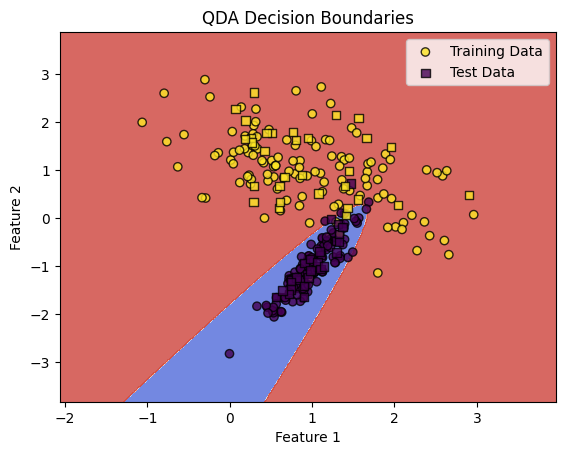

In [ ]:
# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class using the classifier for each point in the mesh
Z = qda_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data', alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test Data', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('QDA Decision Boundaries')
plt.legend()
plt.show()

Here we can see the **confusion matrix** for this model and we observe that there are very few false predictions, for both positive and negative values, the model having a good performance on the dataset.

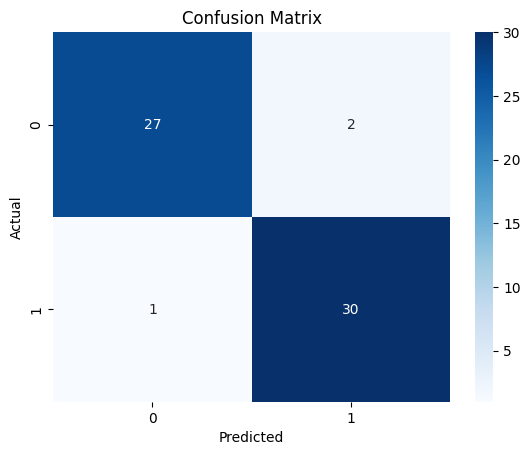

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix and plot it afterwards
cm = confusion_matrix(y_test, qda_clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Trees (Unpruned)

**Decision Tree Assumptions and Characteristics**  
- **Non-Parametric Model**: Decision Trees make no assumptions about the distribution of the underlying data.  
- **Hierarchical Splitting**: The model recursively splits the data into subsets based on feature values, aiming to reduce impurity at each step.  
- **Flexible and Interpretable**: Decision Trees can capture both linear and non-linear relationships. Their tree-like structure makes them highly interpretable.  
- **Overfitting**: Unpruned trees are prone to overfitting, particularly with noisy datasets or limited data.  


https://scikit-learn.org/stable/modules/tree.html

https://en.wikipedia.org/wiki/Decision_tree_learning


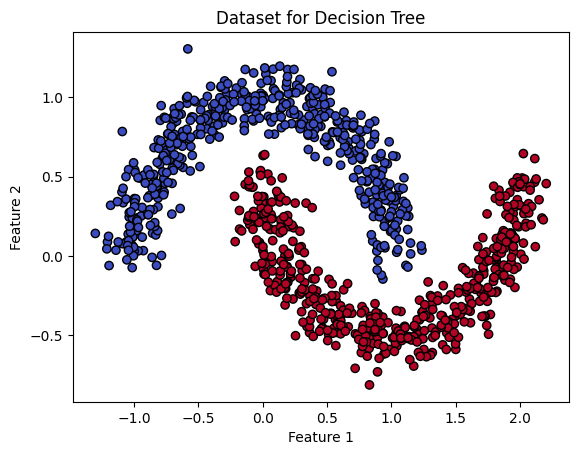

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1)


# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset for Decision Tree')
plt.show()


In [ ]:
# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training data
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_clf.predict(X_test)

# Evaluate the classifier's accuracy on the data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy:.2f}")

scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy: %.3f ± %.3f" % (scores.mean(), scores.std()))

Accuracy of Decision Tree: 0.99
Cross-validated accuracy: 0.991 ± 0.005


## Why This Dataset is Good for Decision Trees  

- **Complex Multi-Class Separation**:  
    - **Overlapping Regions**: The dataset contains **three distinct classes** with overlapping regions.  
    - **Region-Based Splitting**: A Decision Tree can learn region-based splits, effectively partitioning the space into decision regions, even when the boundaries are not linear.  

- **Non-Linearity**:  
    - **No Assumption of Linear Boundaries**: Unlike models that require linear or quadratic boundaries, Decision Trees do not assume any specific boundary form.  
    - **Recursive Splitting**: By recursively splitting the input space, Decision Trees can approximate complex, non-linear decision boundaries, making them suitable for datasets with non-linear class separation.

- **Other methods:**
    - **LDA** would perform poorly due to its assumption of linear boundaries and shared covariance, which doesn't match the non-linear structure of the moons dataset.

    - **Logistic Regression** would also struggle because it assumes a linear decision boundary, and cannot capture the curved separation of the classes.

    - **QDA** might perform slightly better than LDA, as it allows for class-specific covariance and can model some non-linearity, but it still lacks the flexibility to handle the complex decision boundary that Decision Trees can approximate.

    - **SVM** with a linear kernel would fail entirely due to the non-linear class structure. Even an RBF kernel could work, but would require careful tuning, while Decision Trees learn flexible splits directly without needing kernel tricks.

- **Conclusion**:  
    - This dataset is well-suited for **unpruned Decision Trees** because it enables the model to fully leverage its flexibility in creating distinct class regions through recursive binary splitting, even in the presence of complex and non-linear separations.

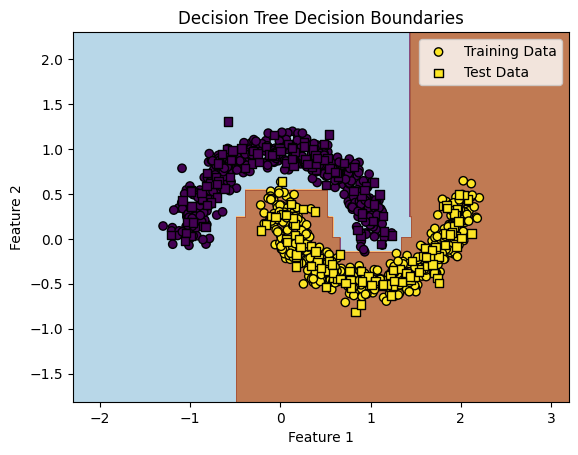

In [ ]:
# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class using the classifier for each point in the mesh
Z = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundaries')
plt.legend()
plt.show()

Here we can see the **confusion matrix** for this model and we observe that there are very few false predictions, for both positive and negative values, the model having a good performance on the dataset.

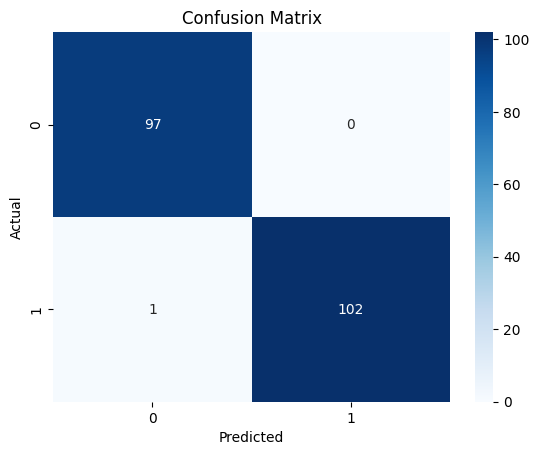

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix and plot it afterwards
cm = confusion_matrix(y_test, dt_clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree with max depth 2
Assumption:

- In the beginning, the whole training set is considered as the root.

- Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.

- Records are distributed recursively on the basis of attribute values.

- Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

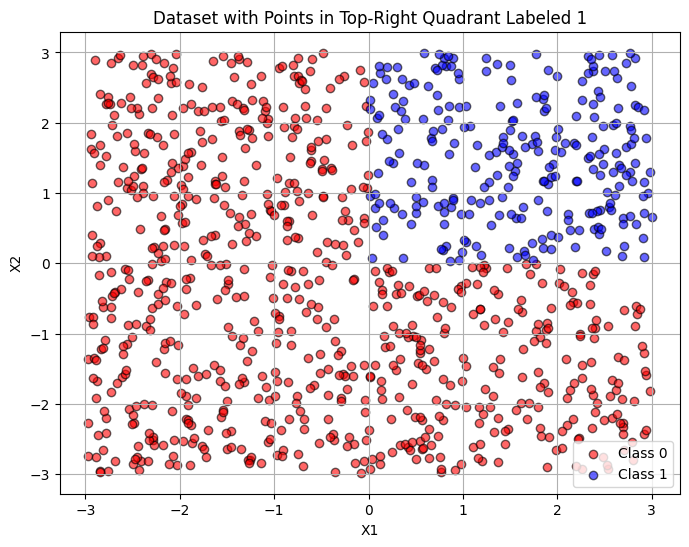

Decision Tree Test Accuracy: 100.00
5-Fold Cross-Validation Accuracy: 99.90


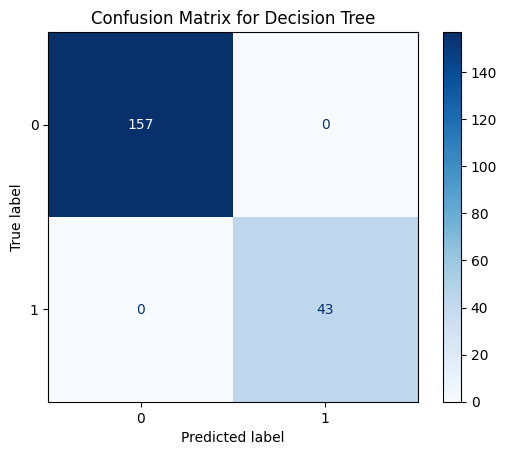

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 1000

# Generate random data for X1 and X2
X1 = np.random.uniform(-3, 3, n)
X2 = np.random.uniform(-3, 3, n)

# Create the labels based on the condition
y = ((X1 > 0) & (X2 > 0)).astype(int)  # Points in the top-right quadrant (X1 > 0, X2 > 0) are labeled 1

# Combine the features into a single matrix
X = np.vstack((X1, X2)).T

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 0], X2[y == 0], color='red', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X1[y == 1], X2[y == 1], color='blue', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset with Points in Top-Right Quadrant Labeled 1')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Train a decision tree with max_depth=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train, y_train)

# Step 3: Calculate accuracy on test set
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Test Accuracy: {dt_accuracy * 100:.2f}")

# 5-fold cross-validation accuracy
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()

print(f"5-Fold Cross-Validation Accuracy: {cv_mean * 100:.2f}")


# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


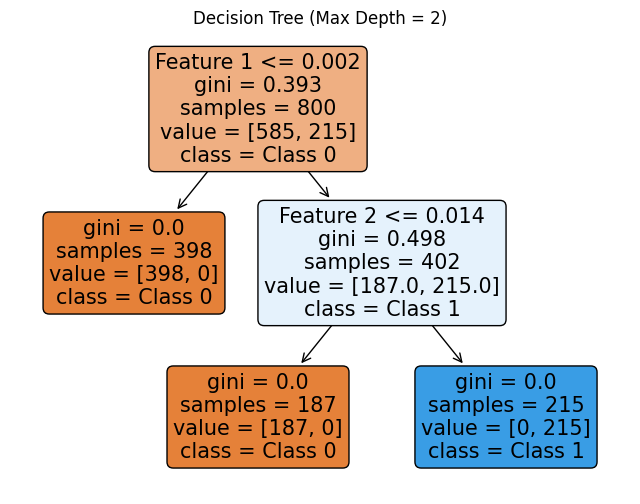

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plot_tree(dt_model, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], rounded=True)
plt.title("Decision Tree (Max Depth = 2)")
plt.show()


Why this dataset is hard to beat:
The 2 independent variables have a non-linear decision boundary. A decision tree with no prunning will overfit and cause mis classification.

---

### SVM Linear

- Linear Separability: The primary assumption of SVM is that the data is or can be transformed into a linearly separable space. In other words, there exists a hyperplane that can distinctly separate the classes.

- Margin Maximization: SVM aims to find the hyperplane that maximizes the margin between classes. This assumes that a larger margin contributes to better generalization and improved performance.

- Noisy Data Handling: SVMs are sensitive to noisy data and outliers, as these may influence the position and orientation of the decision boundary. Outliers can have a significant impact on the resulting hyperplane.

- Kernel Function Choice: The choice of the kernel function (linear, polynomial, radial basis function) and its parameters can affect the performance of SVM. The appropriate kernel and parameters depend on the characteristics of the data.

- Memory Efficiency: SVMs are memory-efficient due to the use of a subset of training points (support vectors) in decision-making. This can be an advantage in terms of memory usage, but it also assumes that these support vectors are representative of the entire dataset.

https://medium.com/@bhagyashrilakhadive/introduction-to-support-vector-machine-svm-4946083b8052

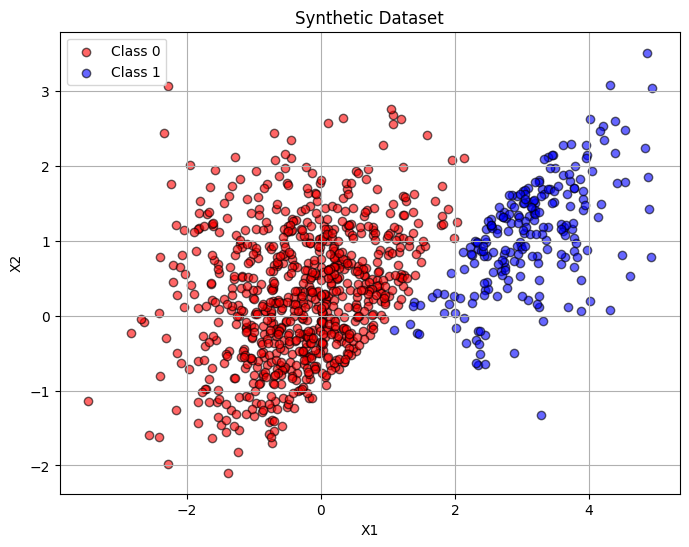

Decision Tree Test Accuracy: 1.000
5-Fold Cross-Validation Accuracy: 0.996


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Step 1: Generate dataset
n = 1000
X1 = np.random.randn(n)
X2 = np.random.randn(n)
y = (X1 - X2 > 1).astype(int)

# Optionally shift one class (class 1) to make it more separable
X1[y == 1] += 2.2
X2[y == 1] += 2

# Combine features into a single matrix
X = np.vstack((X1, X2)).T

# Step 2: Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X1[y == 0], X2[y == 0], color='red', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X1[y == 1], X2[y == 1], color='blue', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Dataset')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Train a decision tree with max_depth=2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC


dt_model = SVC(kernel='linear', random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Calculate accuracy on test set
y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Test Accuracy: {dt_accuracy:.3f}")

# Step 5: 5-Fold Cross Validation
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()
print(f"5-Fold Cross-Validation Accuracy: {cv_mean:.3f}")


### SVM with Radial Basis Function (RBF) Kernel

**SVM Characteristics and Assumptions**  
- **Margin Maximization**: SVMs aim to find the hyperplane that maximizes the margin between classes, ensuring the greatest separation between them.  
- **Kernel Trick**: The **RBF kernel** allows the SVM to map non-linearly separable data into higher dimensions, where a linear separator can be found.  
- **Robust to Overfitting**: With the right regularization and kernel settings, SVMs are highly effective at generalizing, making them robust to overfitting even with complex data.

https://scikit-learn.org/stable/modules/svm.html

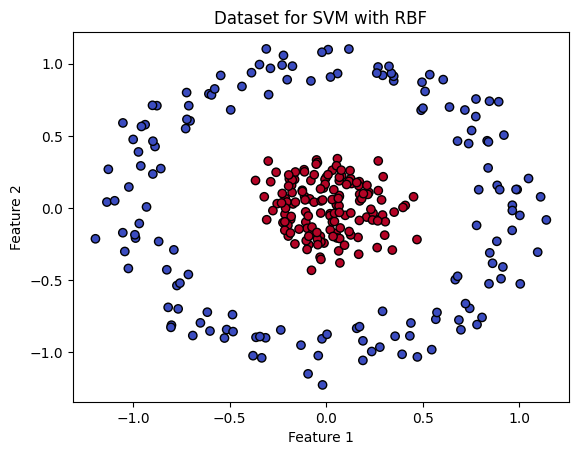

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(300, factor=0.2, noise=0.1, random_state=42)

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset for SVM with RBF')
plt.show()

In [ ]:
# Initialize and fit the SVM model with RBF kernel
svm_clf = SVC(gamma= 'auto', kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the classifier's accuracy on the data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM (RBF Kernel): {accuracy:.2f}")

scores = cross_val_score(svm_clf, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy: %.3f ± %.3f" % (scores.mean(), scores.std()))

Accuracy of SVM (RBF Kernel): 1.00
Cross-validated accuracy: 1.000 ± 0.000


## Why This Dataset is Good for SVM (RBF)

- **Circular Non-Linear Pattern**:  
    - The dataset has nested circular clusters, which are not linearly separable in the original feature space.  
    - An **RBF kernel** can transform the data into a higher-dimensional space, where it becomes separable by a linear hyperplane.

- **Kernel Power**:  
    - The **RBF kernel** is highly effective at handling local decision boundaries, adjusting the decision regions with high flexibility.  
    - SVMs with RBF are particularly powerful for datasets exhibiting radial or elliptical decision boundaries, as seen in this dataset.
- **Other methods:**
    - **LDA** assumes linear boundaries and shared covariance, which fails completely on this concentric circular dataset where linear separation is impossible.

    - **Logistic Regression** is linear and cannot model the circular class boundaries, leading to high misclassification.

    - **QDA** allows for quadratic decision boundaries, but even that isn't sufficient to handle the nested ring structure — it might overfit or find elliptical shapes, but not true nested circles.

    - **Decision Trees** might be able to approximate the rings with many axis-aligned splits, but would require a very deep tree and still produce overfit boundaries that lack the smoothness of an RBF SVM.


- **Conclusion**:  
    - This dataset is a perfect example of where **SVM with RBF kernel** excels, showcasing its ability to model non-linear and nested decision boundaries effectively through kernel-based transformation.

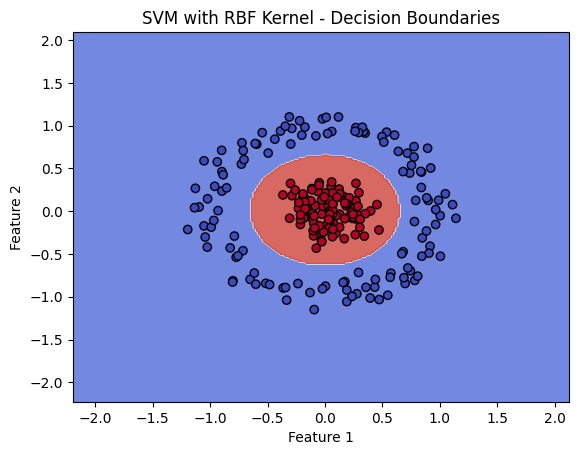

In [ ]:
# Create a mesh grid to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('SVM with RBF Kernel - Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Here we can see the **confusion matrix** for this model and we observe that there are very few false predictions, for both positive and negative values, the model having a good performance on the dataset.

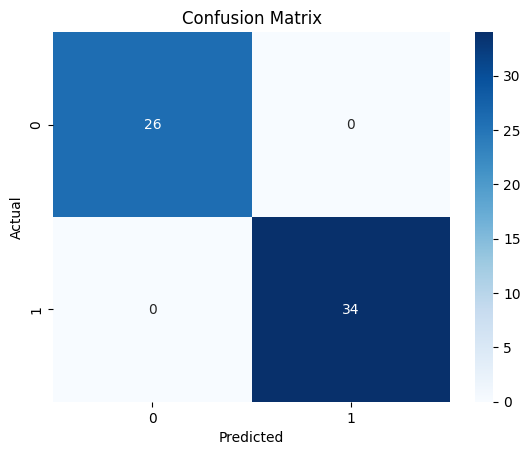

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix and plot it afterwards
cm = confusion_matrix(y_test, svm_clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

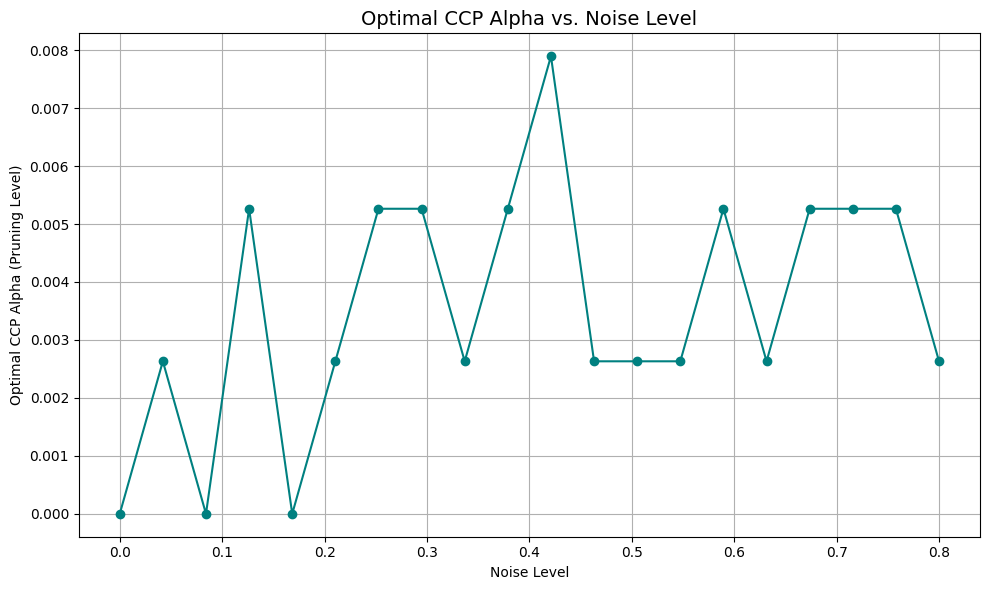

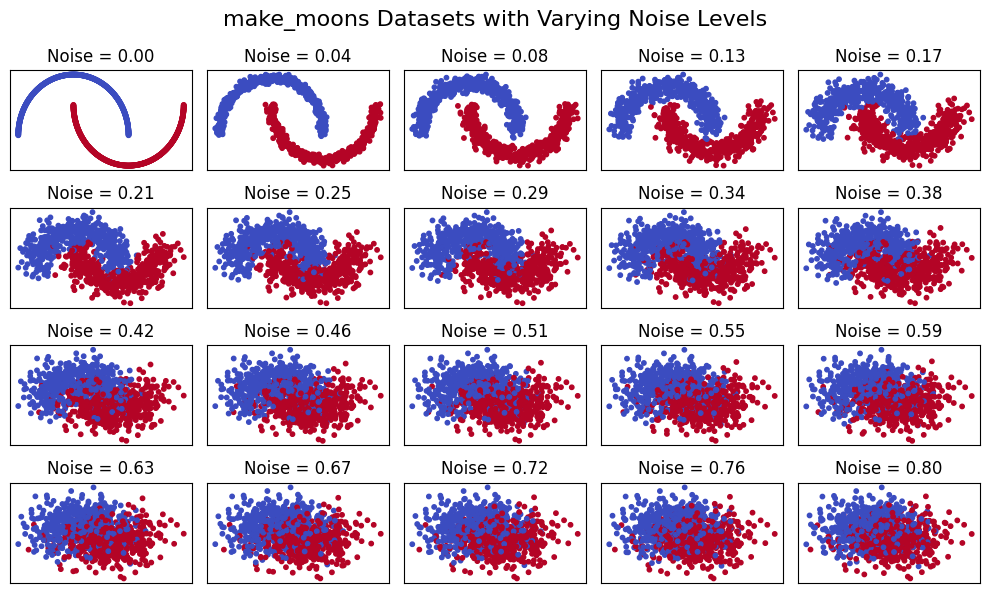

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Parameters
n_samples = 1000
noise_levels = np.linspace(0, 0.8, 20)  # Noise levels from 0 to 0.5
ccp_alpha_range = np.linspace(0, 0.05, 20)  # Candidate alpha values

best_alphas = []

# 1. Compute optimal ccp_alpha for each noise level
for noise in noise_levels:
    # Generate noisy moons
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    best_acc = 0
    best_alpha = 0

    for alpha in ccp_alpha_range:
        clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
        clf.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf.predict(X_test))

        if acc > best_acc:
            best_acc = acc
            best_alpha = alpha

    best_alphas.append(best_alpha)

# 2. Plot noise level vs optimal ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, best_alphas, marker='o', color='teal')
plt.title("Optimal CCP Alpha vs. Noise Level", fontsize=14)
plt.xlabel("Noise Level")
plt.ylabel("Optimal CCP Alpha (Pruning Level)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Plot datasets at different noise levels
fig, axes = plt.subplots(4, 5, figsize=(10  , 6))
axes = axes.ravel()

for i, noise in enumerate(noise_levels):
    X, y = make_moons(n_samples=1000, noise=noise, random_state=42)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=10)
    axes[i].set_title(f"Noise = {noise:.2f}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])

fig.suptitle("make_moons Datasets with Varying Noise Levels", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


### Interpretation of Results: Model Capacity, Bias, Variance, and Total Error

The experiment evaluated decision trees trained on datasets with varying noise levels using bias-variance decomposition. The following patterns were observed:

- **Model Capacity**: Decision trees are high-capacity models capable of fitting complex patterns. When noise is low, this capacity helps achieve low bias and variance. However, in the presence of noise, high capacity leads to overfitting (high variance).

- **Bias Error**:
  - At **low noise (0.00)**, the model captures the underlying pattern well, resulting in very low bias.
  - As **noise increases**, the signal becomes harder to learn, and pruning simplifies the model. This leads to a **significant increase in bias** since the model cannot fully explain the noisy or conflicting patterns.

- **Variance Error**:
  - At low noise, the tree's predictions are stable (low variance).
  - With higher noise, the model becomes more sensitive to the training data, and variance increases, but pruning helps.

- **Total Error (Expected Loss)**:
  - Grows significantly with noise due to increases in both bias and variance.
  - Bias becomes the **dominant contributor** to total error at high noise levels.

#### Summary:
In low-noise settings, decision trees perform well due to their high capacity. As noise increases, the same capacity leads to overfitting, and even with pruning, both **bias and variance** increase — with **bias contributing most to total error** at high noise levels.

In [3]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np

# Select 3 noise levels (low, medium, high)
noise_levels = np.linspace(0, 0.8, 20)
selected_noise_indices = [0, 10, 19]
selected_noise_levels = [noise_levels[i] for i in selected_noise_indices]
selected_alphas = [best_alphas[i] for i in selected_noise_indices]

for noise, alpha in zip(selected_noise_levels, selected_alphas):
    print(f"Noise Level: {noise:.2f}, CCP Alpha: {alpha:.4f}")
    
    # Generate dataset
    X, y = make_moons(n_samples=1000, noise=noise, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y)

    # Decision tree with optimal alpha
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test,
        loss='0-1_loss',
        random_seed=42
    )

    # Print average for each noise level
    print(f"Average expected loss: {avg_expected_loss:.3f}")
    print(f"Average bias: {avg_bias:.3f}")
    print(f"Average variance: {avg_var:.3f}\n")


Noise Level: 0.00, CCP Alpha: 0.0000
Average expected loss: 0.012
Average bias: 0.010
Average variance: 0.008

Noise Level: 0.42, CCP Alpha: 0.0079
Average expected loss: 0.142
Average bias: 0.117
Average variance: 0.062

Noise Level: 0.80, CCP Alpha: 0.0026
Average expected loss: 0.335
Average bias: 0.303
Average variance: 0.193



## Ensemble Methods

Ensemble methods combine multiple machine learning models to produce a better prediction than any individual model. This approach uses the "wisdom of the crowd" principle.

* **Random Forest**
* **Bagging (Bootstrap Aggregating)**, like the `BaggingClassifier`, builds multiple independent models (in this case, Decision Trees) on different random subsets of the training data (bootstrapping). Bagging primarily aims to reduce variance. The Out-of-Bag (OOB) score provides a useful estimate of the model's generalization performance without needing a separate validation set, using the data points not included in each bootstrap sample.

* **Boosting**, exemplified by `AdaBoostClassifier`, builds models sequentially. Each model focuses more on the instances that previous models misclassified. This means models are not independent; they learn from the mistakes of their predecessors. Boosting typically aims to reduce bias and can often achieve higher accuracy than Bagging, though it can be more prone to overfitting if not carefully tuned.

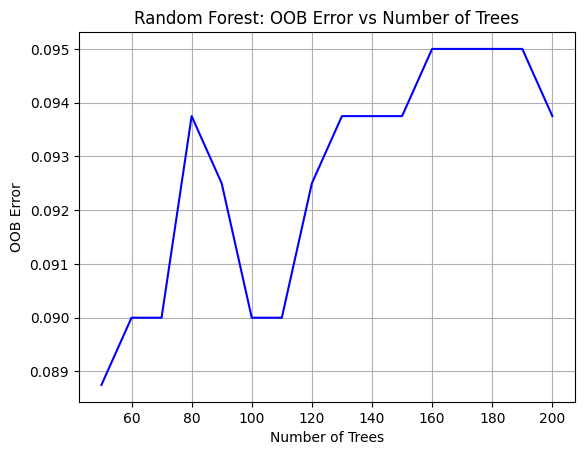

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate dataset
n_samples = 1000  # Number of samples
noise = 0.3  # Noise level
X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store OOB errors
oob_errors = []
n_estimators_range = range(50, 201, 10)  # Number of trees to evaluate (from 10 to 200)

# Train Random Forests with different number of trees
for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    oob_errors.append(1 - rf.oob_score_)

# Plot the learning curve
plt.plot(n_estimators_range, oob_errors, label="OOB Error", color="blue")
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('Random Forest: OOB Error vs Number of Trees')
plt.grid(True)
plt.show()


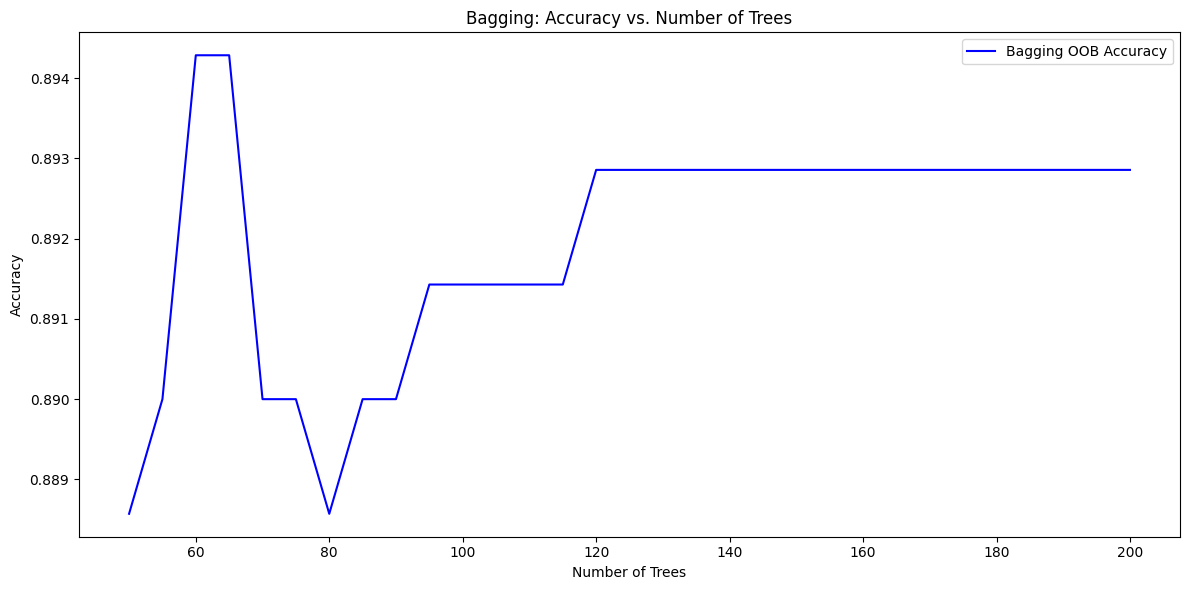

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate the moons dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# Split the dataset into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the base classifier for Bagging and AdaBoost
base_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Arrays to store accuracy results
adaboost_accuracies = []
oob_accuracies = []

# Number of trees (estimators) to test
n_estimators_range = range(50, 201, 5)

# Bagging with OOB estimates
for n_estimators in n_estimators_range:
    # Bagging Classifier with OOB score
    bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=n_estimators, oob_score=True, random_state=42)
    bagging_clf.fit(X_train, y_train)
    
    # Store accuracies
    oob_accuracies.append(bagging_clf.oob_score_)

plt.figure(figsize=(12, 6))

# Plot Bagging accuracy and OOB accuracy
plt.plot(n_estimators_range, oob_accuracies, label='Bagging OOB Accuracy', color='blue')
plt.title("Bagging: Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


## Bagging Performance Analysis

The plot on the left shows the performance of the `BaggingClassifier` as the number of trees increases:

* **OOB Accuracy :** The Out-of-Bag accuracy shows more variation, especially at lower numbers of trees. It starts relatively high, dips, and then increases, stabilizing around 89.3% from 120 trees to 200.
    * The OOB score is generally considered a good estimate of test set performance.
    * The initial volatility in OOB accuracy for fewer trees is expected, as the OOB estimate is less reliable with fewer bags.
    * The stabilization suggests that the ensemble's generalization estimate becomes consistent after about 120 trees.

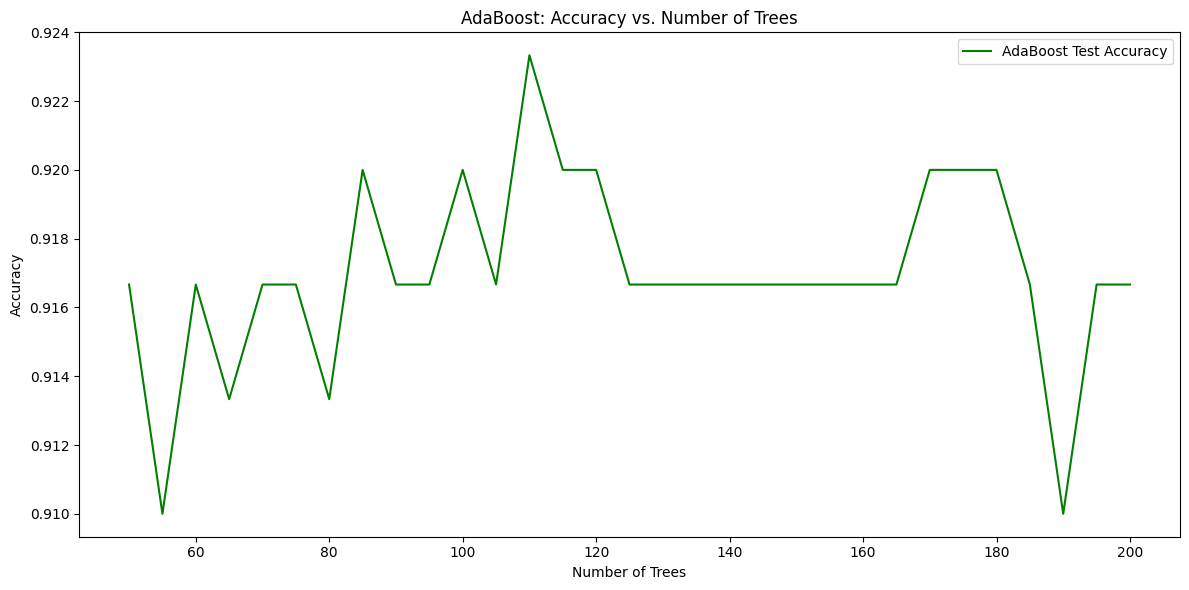

In [ ]:
# AdaBoost
for n_estimators in n_estimators_range:
    # AdaBoost Classifier
    adaboost_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=n_estimators, random_state=42)
    adaboost_clf.fit(X_train, y_train)
    
    # Store accuracy
    y_pred_adaboost = adaboost_clf.predict(X_test)
    adaboost_accuracies.append(accuracy_score(y_test, y_pred_adaboost))

# Plot learning curves
plt.figure(figsize=(12, 6))

# Plot AdaBoost accuracy
plt.plot(n_estimators_range, adaboost_accuracies, label='AdaBoost Test Accuracy', color='green')
plt.title("AdaBoost: Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

## AdaBoost Performance Analysis

The plot on the right illustrates the performance of the `AdaBoostClassifier`:

* **Test Accuracy :** AdaBoost's test accuracy exhibits significant fluctuation as the number of trees increases. It achieves higher peaks (reaching over 92.3% around 110 trees), but also shows considerable drops.
    * The general trend seems slightly upward, but it's not a smooth convergence. The performance oscillates, suggesting sensitivity to the number of estimators. AdaBoost can sometimes overfit as more trees are added, potentially explaining some of the later dips if the model starts fitting noise.
    * Despite the volatility, AdaBoost consistently reaches higher accuracy levels on this dataset with this base estimator, indicating its effectiveness in boosting the performance of the weak decision tree learners by focusing on misclassified samples.
    * The peak performance around 110 estimators suggests this might be a near-optimal number for AdaBoost in this setup.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


# Use same base classifier for fairness
base_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Define classifiers
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=200, random_state=42)
adaboost_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=200, random_state=42)

# Perform 5-fold cross-validation
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
bagging_scores = cross_val_score(bagging_clf, X, y, cv=5)
adaboost_clf = AdaBoostClassifier(estimator=base_clf, algorithm='SAMME', n_estimators=n_estimators, random_state=42)

# Print mean and standard deviation of accuracy
print("Random Forest CV Accuracy: {:.3f} ± {:.3f}".format(rf_scores.mean(), rf_scores.std()))
print("Bagging CV Accuracy      : {:.3f} ± {:.3f}".format(bagging_scores.mean(), bagging_scores.std()))
print("AdaBoost CV Accuracy     : {:.3f} ± {:.3f}".format(adaboost_scores.mean(), adaboost_scores.std()))


Random Forest CV Accuracy: 0.905 ± 0.012
Bagging CV Accuracy      : 0.888 ± 0.018
AdaBoost CV Accuracy     : 0.896 ± 0.012
